In [ ]:
import os
import cv2
import random
import numpy as np

In [68]:
VIDEO_PATH = 'dataset/Test/Violence'
video_list = os.listdir(VIDEO_PATH)
random_video = random.choice(video_list)
selected_video = os.path.join(VIDEO_PATH, random_video)

In [72]:
def show_vid(vid_path):
    cap = cv2.VideoCapture(vid_path)
    frames = []
    prev = None
    no_frame = 0
    
    print('opening..', vid_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        if no_frame==0:
            prev = frame
            no_frame += 1
            continue
        diff = cv2.absdiff(frame, prev)
        #diff = mr - prev
        
        frames.append(diff)
        cv2.imshow('f', diff)
        if cv2.waitKey(100) and 0xFF==ord('q'):
            break
        no_frame += 1
    cap.release()
    cv2.destroyAllWindows()
    return frames

In [67]:
show_vid('dataset/Test/Violence/NV_353.mp4')

opening.. dataset/Test/Violence/NV_353.mp4


In [73]:
frames = show_vid(selected_video)

opening.. dataset/Test/Violence\v_FTSN_-_5.mp4


In [ ]:
cv2.destroyAllWindows()

7
14
21
28
36
43
50
57


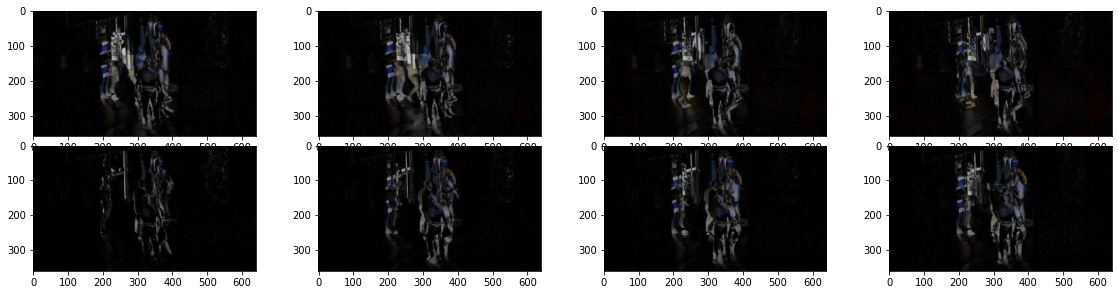

In [91]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
columns = 4
rows = 2
k = len(frames) // 8
for r in range(1, rows+1):
    init = (r-1) * (len(frames)//rows)
    for i in range(1, 5):
        print(init + (i*k))
        img = frames[init + (i*k)]
        fig.add_subplot(r, columns, i)
        plt.imshow(img)
plt.show()